<p style="text-align: center; font-size:20px">Case Stone Payments
<p style="text-align: center; font-size:15px">Customer Relationship Management (CRM) Analytics
<hr />

# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading df_cleaned and resetting Dtypes
df = pd.read_csv("df_cleaned.csv")
df[['cred_date', 'date_ref']] = df[['cred_date', 'date_ref']].apply(pd.to_datetime)
pesquisa_cat = df['pesquisa_sat'].unique().tolist()
df['pesquisa_sat'] = pd.Categorical(df['pesquisa_sat'], categories=pesquisa_cat, ordered=False)

#### Basic data exploration:

In [3]:
# Number of users
df['accountid'].nunique()

31429

In [4]:
# Quantity per "macro" subject type
df['assunto_short'].value_counts().sort_values(ascending=False)

Produto                   22182
Aplicativo                20507
Logística                 15583
Cadastro                   6310
Pedido                     3266
Transferência de saldo     3013
Transação                  2265
Feedback do cliente        1205
Outros                     1162
Bandeira                   1061
Incidente                   486
Bandeiras                   230
Risco                       162
Telecom                      36
Comunicados                  21
Name: assunto_short, dtype: int64

The **Product**, **Application** and **Logistics** subjects represent 75% of the 77,489 calls.

In [5]:
# Qty and types of machine
df['max_machine'].value_counts().sort_values(ascending=False)

T2      28569
T3      25693
T1      22625
NONE      602
Name: max_machine, dtype: int64

In [6]:
# Qty of ratings
df['pesquisa_sat'].value_counts().sort_values(ascending=False)

SemValor       65904
Enviado         9996
Incrivel         899
Bom              425
Normal           112
NaoResolveu      107
Feliz             19
MalAtendido       16
Triste             6
Pessimo            3
Cansativo          2
Name: pesquisa_sat, dtype: int64

**85% of tickets are without the satisfaction survey value.**

Analyzing whether the satisfaction survey has any basic correlation with *waitingtime* or *tempo_de_casa*, through the analysis of their medians (50%):

In [7]:
# Groupby of pesquisa_sat by describe of waitingtime
(df.groupby('pesquisa_sat')[['waitingtime']].describe()).sort_values(by=('waitingtime','50%'), ascending=False)

waitingtime                                                  \
                   count       mean         std  min    25%   50%    75%   
pesquisa_sat                                                               
MalAtendido         16.0  22.250000   33.548969  7.0  10.75  13.0  17.25   
Bom                425.0  27.830588  104.358279  1.0   8.00  12.0  16.00   
NaoResolveu        107.0  35.551402   96.504300  1.0   7.00  12.0  16.50   
Enviado           9996.0  25.354342   89.626335  1.0   8.00  11.0  16.00   
Incrivel           899.0  20.875417   50.676120  1.0   8.00  11.0  16.00   
Normal             112.0  22.080357   55.936441  4.0   8.00  11.0  17.00   
Feliz               19.0  11.526316    4.401621  5.0   9.00  11.0  14.00   
Cansativo            2.0  10.500000    9.192388  4.0   7.25  10.5  13.75   
Triste               6.0  10.833333    5.036533  6.0   6.75  10.0  13.25   
Pessimo              3.0   9.666667    2.516611  7.0   8.50  10.0  11.00   
SemValor         65904.0  15.837066   76.758929  0.0   5.00   9.0  14.00   

                      
                 max  
pesquisa_sat          
MalAtendido    146.0  
Bom           1408.0  
NaoResolveu    717.0  
Enviado       2594.0  
Incrivel       698.0  
Normal         556.0  
Feliz           21.0  
Cansativo       17.0  
Triste          19.0  
Pessimo         12.0  
SemValor      7993.0

In [8]:
# Groupby of pesquisa_sat by describe of tempo_de_casa
(df.groupby('pesquisa_sat')[['tempo_de_casa']].describe()).sort_values(by=('tempo_de_casa','50%'), ascending=False)

tempo_de_casa                                                     \
                     count       mean         std    min    25%   50%     75%   
pesquisa_sat                                                                    
Pessimo                3.0  93.000000  126.463433    0.0  21.00  42.0  139.50   
Cansativo              2.0  34.500000   16.263456   23.0  28.75  34.5   40.25   
Triste                 6.0  49.500000   68.401023    5.0   9.75  22.5   48.75   
MalAtendido           16.0  49.125000   74.098920    4.0  13.00  21.0   56.75   
SemValor           65904.0  42.889809   66.526377 -174.0   8.00  19.0   50.00   
NaoResolveu          107.0  38.364486   63.527203  -25.0   7.00  14.0   34.50   
Enviado             9996.0  32.196078   62.209473 -231.0   5.00  12.0   31.00   
Normal               112.0  21.642857   47.045475 -116.0   2.00   8.0   22.00   
Feliz                 19.0  51.157895   79.893167  -80.0   4.00   8.0   92.00   
Bom                  425.0  19.621176   49.767810 -170.0   2.00   7.0   17.00   
Incrivel             899.0  22.285873   55.267778 -174.0   2.00   6.0   14.00   

                     
                max  
pesquisa_sat         
Pessimo       237.0  
Cansativo      46.0  
Triste        184.0  
MalAtendido   308.0  
SemValor      457.0  
NaoResolveu   315.0  
Enviado       341.0  
Normal        295.0  
Feliz         215.0  
Bom           308.0  
Incrivel      340.0

Regardless of whether we are analyzing the mean or median, there is no obvious trend between values about **satisfaction and waitingtime**. For example: Sad and Happy have close averages and medians; Happy has mean/median greater than Sad, but MalAtendido has mean/median greater than Incredible.

However, there is a tendency for the median of **tempo_de_casa** to be higher for negative satisfaction ratings (Pessimo, Cansativo, Sad, MalAtendido, Not Solved) than for positive ones (Normal, Happy, Good, Amazing) - which allows us ytoassume that older customers can be more demanding.

**Important:** The decision to sort desc by the median (instead of the mean) is to avoid situations where outliers distort the means.

#### Factoring non-numeric columns to be able to execute a scatter_matrix:

*NOTE: It is not possible to incorporate **categorical ordinal** numerical value for pesquisa_sat because there is no obvious scale (ordinal).
For example, which is worse: Sad or Tired?*

In [9]:
from scipy.stats import chisquare
df_factor = df[['accountid', 'cred_date', 'date_ref', 'max_machine', 'assunto_short'
               , 'pesquisa_sat']].apply(lambda x : pd.factorize(x)[0])+1

df_factor['tempo_de_casa'] = df['tempo_de_casa']
df_factor['waitingtime'] = df['waitingtime']
df_factor = df_factor[['accountid', 'cred_date', 'date_ref', 'tempo_de_casa', 'max_machine', 'assunto_short', 'waitingtime', 'pesquisa_sat']]
df_factor

,accountid,cred_date,date_ref,tempo_de_casa,max_machine,assunto_short,waitingtime,pesquisa_sat
0,1,1,1,3.0,1,1,15.0,1
1,1,1,1,3.0,1,2,15.0,1
2,1,1,2,57.0,1,2,1.0,1
3,2,2,3,1.0,2,3,6.0,1
4,2,2,3,1.0,2,4,6.0,1
...,...,...,...,...,...,...,...,...
77484,31429,171,50,67.0,3,1,9.0,1
77485,31429,171,63,81.0,3,2,4.0,1
77486,31429,171,52,93.0,3,8,3.0,1
77487,31429,171,52,93.0,3,2,3.0,1


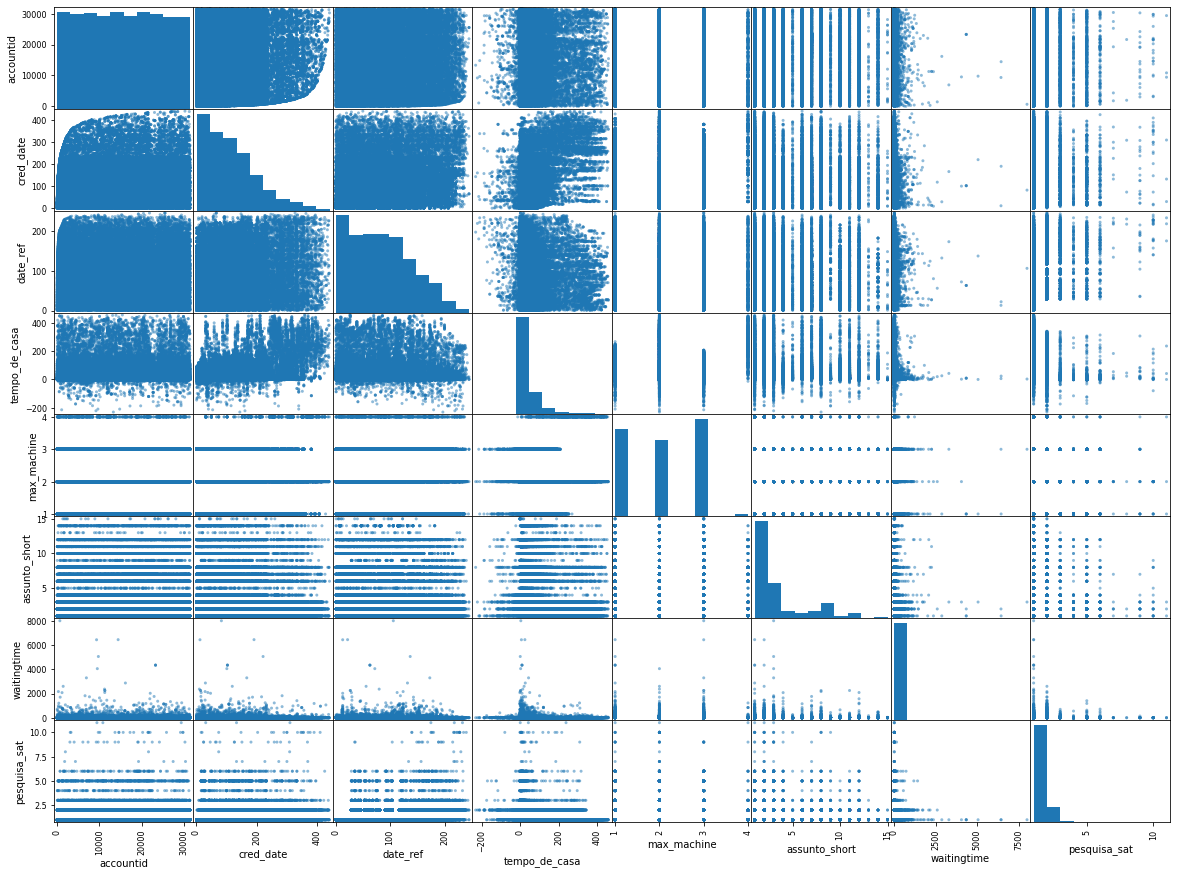

In [10]:
pd.plotting.scatter_matrix(df_factor, figsize=(20,15));

Little expressive attribute correlations with *pesquisa_sat*, but we can see a small pattern in *tempo_de_casa*, *max_machine*, *assunto_short*, *waitingtime* - it might be interesting to investigate for the clustering question below.

We could perform a Pearson correlation with the numerical variables we have, or Chi-squared with the categorical variables - Let's get to the questions.

In [11]:
df_factor.to_csv("df_factor.csv", date_format='%Y-%m-%d', index=False)